In [66]:
import numpy as np
import pandas as pd
from tqdm import tqdm

import re
import string

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer  
stop_words = stopwords.words('english')

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report

import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [67]:
df = pd.read_csv('train-dataset.csv')
test = pd.read_csv('test-dataset.csv')

In [68]:
sw = stopwords.words('english')
lemmatizer = WordNetLemmatizer() 

def clean_text(text):
    
    text = text.lower()
    
    text = re.sub(r"[^a-zA-Z?.!,¿]+", " ", text) # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",")

    text = re.sub(r"http\S+", "",text) #Removing URLs 
    #text = re.sub(r"http", "",text)
    
    html=re.compile(r'<.*?>') 
    
    text = html.sub(r'',text) #Removing html tags
    
    punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`" + '_'
    for p in punctuations:
        text = text.replace(p,'') #Removing punctuations
        
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    
    text = [lemmatizer.lemmatize(word) for word in text]
    
    text = " ".join(text) #removing stopwords
    
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text) #Removing emojis
    
    return text

In [69]:
# df['text'] = df['text'].apply(lambda x: clean_text(x))
# df.head()
# df.to_csv('train-dataset.csv')

test['text'] = test['text'].apply(lambda x: clean_text(x))
test.head()
test.to_csv('test-dataset.csv')

AttributeError: 'float' object has no attribute 'lower'

In [ ]:
# X_train, X_val , y_train, y_val = train_test_split(df['text'].values,df['isdog'].values,test_size=0.2,random_state=123,stratify=df['isdog'].values)
X_train , y_train = df['text'].values,df['isdog'].values

In [ ]:
tfidf_vectorizer = TfidfVectorizer() 

tfidf_train_vectors = tfidf_vectorizer.fit_transform(X_train)

# tfidf_val_vectors = tfidf_vectorizer.transform(X_val)
tfidf_test_vectors = tfidf_vectorizer.transform(test['text'].values)

In [ ]:
classifier = RandomForestClassifier()

classifier.fit(tfidf_train_vectors,y_train)

RandomForestClassifier()

In [ ]:
# y_pred = classifier.predict(tfidf_val_vectors)
# print(classification_report(y_val,y_pred))

In [ ]:
y_test = test['isdog'].values
y_pred = classifier.predict(tfidf_test_vectors)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.24      0.12      0.16        64
           1       0.91      0.96      0.93       582

    accuracy                           0.87       646
   macro avg       0.57      0.54      0.55       646
weighted avg       0.84      0.87      0.86       646



<Axes: >

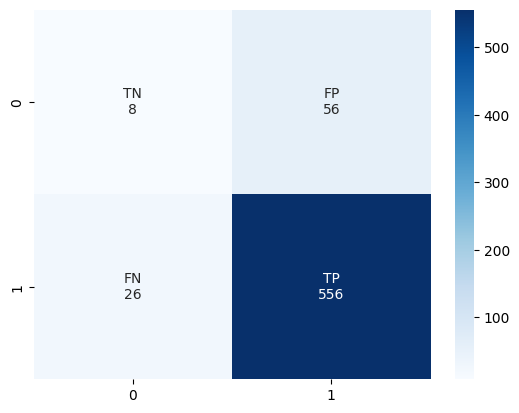

In [ ]:
cnf_matrix = confusion_matrix(y_test,y_pred)
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues')